In [14]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pylab as pl
from scipy import linalg

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [180]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])
test_vec = np.array([0.5, 3])

In [182]:
x + 2*y + 3*z

array([5, 7])

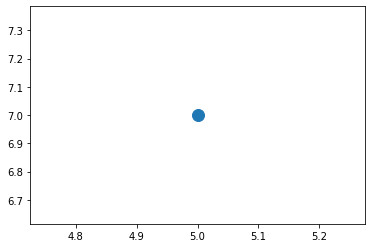

In [183]:
point = x + 2*y + 3*z
plt.plot(point[0], point[1], marker='o', linewidth=2, markersize=12)

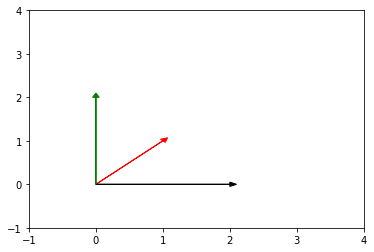

In [47]:
ax = plt.axes()

plt.xlim( [-1, 4] )
plt.ylim( [-1, 4] )

ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.1, fc='r', ec='r' )
ax.arrow( 0, 0, y[0], y[1], head_width=0.1, head_length=0.1, fc='k', ec='k' )
ax.arrow( 0, 0, z[0], z[1], head_width=0.1, head_length=0.1, fc='g', ec='g' )
# ax.arrow( 0, 0, test_vec[0], test_vec[1], head_width=0.1, head_length=0.1, fc='k', ec='k' )

plt.show()

In [48]:
def get_vectors_angle(vec1, vec2):
    # длины векторов
    vec1Length = np.linalg.norm( vec1 )
    vec2Length = np.linalg.norm( vec2 )
    
    # угол между векторами в градусах
    return print(f'The angle between your vectors is \
{round((np.dot( vec1, vec2 ) / ( vec1Length * vec2Length )) * 360 /2 /np.pi, 2)}°')

In [49]:
get_vectors_angle(x,y)

The angle between your vectors is 40.51°


In [50]:
get_vectors_angle(x,z)

The angle between your vectors is 40.51°


In [51]:
get_vectors_angle(y,z)

The angle between your vectors is 0.0°


In [46]:
# get_vectors_angle(test_vec, z)

In [54]:
z

array([0, 2])

In [55]:
np.dot(y,z)/(np.linalg.norm(y) * np.linalg.norm(z))

0.0

## Задание 2

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и решение по алгоритму на бумажке). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [56]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

#### Задание 2 - решение на numpy (для всех мтариц)

In [131]:
def find_eigenvector_eigenvalue(my_matrix):
    w, v = np.linalg.eig(my_matrix)
    for i in range(len(w)):
        print("Собственное значение " + str(w[i]))
        print("соответствующий ему собственный вектор " + str(v[:,i]))

In [132]:
find_eigenvector_eigenvalue(m1)

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


In [133]:
m1

array([[2, 2],
       [1, 3]])

#### Задание 2 - решение "на бумажке", только для матрицы 2х2.

In [120]:
def enter_solutions_2x2_matrix():
    solution_x = float(input('Enter your solution for x: '))
    solution_y = float(input('Enter your solution for y: '))
    solution = np.array([solution_x, solution_y])
    return solution

In [129]:
def find_eigenvector_eigenvalue_step_by_step_2x2(my_2_x_2_matrix):
    b = -m1[0,0] - m1[1,1]
    c = m1[0,0] * m1[1,1] - m1[1,0] * m1[0,1]
    print(f'Step 1 - solve the quadratic equation from matrix determinator x^2 + ({b})*x + ({c})')
    d = (b**2) - (4*a*c)
    print(f'Step 1.1 - calculate the discriminant by formula d = b^2 - 4*(a*c), where d = {d}')
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    eigenvalues = [sol1, sol2]
    print(f'Step 1.2 - find two solutions by formula (-b ± d^2)/(2*a)')
    print('The solution are {0} and {1}'.format(sol1,sol2))
    print('Step 2 - insert each solutions in matrix:')
    print(f'[[({m1[0,0]} - λ), {m1[0,1]}],')
    print(f'[{m1[1,0]}, ({m1[1,1]} - λ)]]')
    for i in eigenvalues:
        print(f'find one possible solution for the system of linear equations with λ = {i}:')
        left_part = np.array([[m1[0,0]-i, m1[0,1]], [m1[1,0], m1[1,1]-i]])
        right_part = np.array([0, 0])
        print(f'{left_part[0,0]}*x + {left_part[0,1]}*y,')
        print(f'{left_part[1,0]}*x + {left_part[1,1]}*y')
        solution = enter_solutions_2x2_matrix()
        if np.allclose( np.dot(left_part, solution),  right_part):
            print(f'Your solution is OK, your eigenvalue is {i} and your eigenvector is {solution}')
        else:
            print('Wrong solution, do you want to try one more?')
            one_more = int(input('Enter 1 to try another solution, enter 0 to finish.'))
            if one_more == 1:
                enter_solutions_2x2_matrix()
            elif one_more == 0:
                print('Stop')

In [134]:
find_eigenvector_eigenvalue_step_by_step_2x2(m1)

Step 1 - solve the quadratic equation from matrix determinator x^2 + (-5)*x + (4)
Step 1.1 - calculate the discriminant by formula d = b^2 - 4*(a*c), where d = 9
Step 1.2 - find two solutions by formula (-b ± d^2)/(2*a)
The solution are 1.0 and 4.0
Step 2 - insert each solutions in matrix:
[[(2 - λ), 2],
[1, (3 - λ)]]
find one possible solution for the system of linear equations with λ = 1.0:
1.0*x + 2.0*y,
1.0*x + 2.0*y
Enter your solution for x: -0.89442719
Enter your solution for y: 0.4472136
Your solution is OK, your eigenvalue is 1.0 and your eigenvector is [-0.89442719  0.4472136 ]
find one possible solution for the system of linear equations with λ = 4.0:
-2.0*x + 2.0*y,
1.0*x + -1.0*y
Enter your solution for x: -0.70710678
Enter your solution for y: -0.70710678
Your solution is OK, your eigenvalue is 4.0 and your eigenvector is [-0.70710678 -0.70710678]


## Задание 3

Найдите сингулярное разложение матрицы.

In [136]:
m3 = np.array([[1, 2],
               [2, 3]])
m3

array([[1, 2],
       [2, 3]])

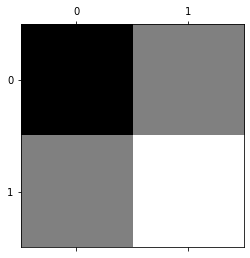

In [139]:
plt.matshow(m3, cmap = 'gray')
plt.show()

In [153]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [163]:
U, s, V = np.linalg.svd(m3)
S = np.zeros((m3.shape[0], m3.shape[1]))
S[:m3.shape[0], :m3.shape[0]] = np.diag(s)
# n_component = 3
# S = S[:, :n_component]
# V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)
# print(V, U, s, S, sep='\n')
# np.dot(V, V.T)

[[1.00 2.00]
 [2.00 3.00]]


In [164]:
# plt.matshow(A, cmap = 'gray')